# Homework 3
### Due: Thursday Feb. 27

#### Numerical Derivative VS Known Derivative

Consider the function $ 1 + \frac{1}{2} + tanh(2x)$. You should be able to write the derivative without much effort (if not feel free to google it, remember hyperbolic trig functions behave similarly to their traditional counterparts when differentiating).

Calculate the derivative of this function in the range $-2 \le x \le 2$ using the central difference method. Choose your own (**suitable**) spacing. Plot your computed derivative as points and use a line to plot the analytic solution through the same points. How accurate is your computed derivative?

(20 points)

Text(0.5, 1.0, 'Derivative of 1.5 + $tanh(x)$')

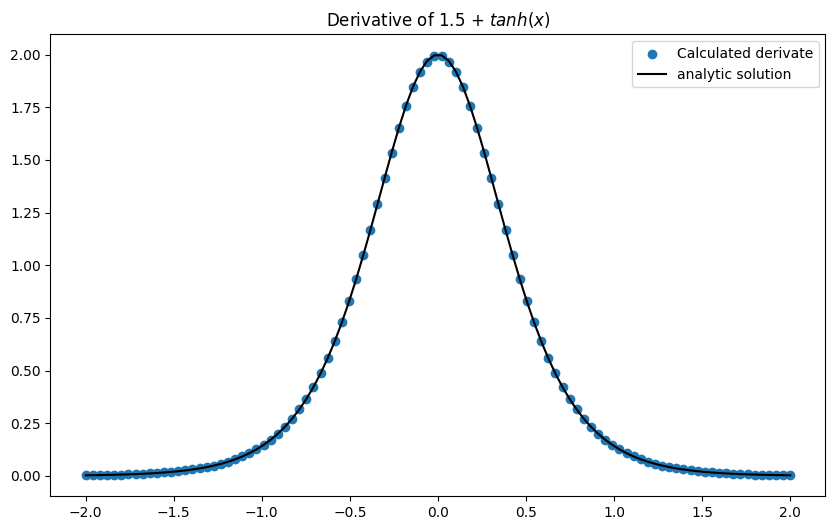

In [60]:
# code
import numpy as np
from matplotlib import pyplot as plt


def derivative(function,x,h):
    dx = (function(x+h) - function(x-h))/(2*h)
    return dx
def tanh(x):
    return 1 + 0.5 + np.tanh(2*x)

steps = 100
stepsize = 4 / steps # taking 2 - (-2) / 1000 to generate a stepsize
xVals = np.linspace(-2,2,steps)
dxVals = []
analyticVals = 2*(1- np.tanh(2*xVals)**2)

for i in xVals:
    dxVals.append(derivative(tanh,i,stepsize))

fig = plt.figure(figsize = (10,6))
ax = plt.subplot(111)
ax.scatter(xVals,dxVals, label = "Calculated derivate")
ax.plot(xVals,analyticVals, c = "black", label = "analytic solution")
ax.legend()
ax.set_title("Derivative of 1.5 + $tanh(x)$")

#### Electric field of a charge distribution

We're all well aware of the endless fun one can have finding analytic solutions to electrostatic problems. But I propose to you that it is even more fun to let the computer do the work! Once you've carefully written the code.

Recall the electric potential at a distance $r$ from a point charge is given by $\phi = q/4 \pi \epsilon_0 r$, and the electric field can be found by $\vec{E} = - \nabla \phi$.

Consider two charges, of $\pm C$, 10 cm apart. Calculate the electric potential on a 1m x 1m plane surrounding the charges, using a grid of points spaced 1 cm apart. Plot the potential. (Note: 1 cm is a starting point, once you plot the potential you may decide you want a more or less dense grid, feel free to choose a grid that looks good. The computation should be fast enough to play around with this parameter.) The easiest way to plot a 2-dimensional array of scalar values is to use the `imshow` function in `matplotlib.pyplot`. The function will accept as its first argument a 2D array and produce a map with somewhat reasonable colors, but you can also pass kwargs for `cmap`, `vmin`, and `vmax`. The documentation will be helpful.

(20 points)

You may find a few points very close to the charges end up being "too close" and the very small distances lead to floating point issues. A normal solution to this type of issue is to use a "softening" parameter, which is a small number that is used as an enforced minimum, i.e. if your calculated number is less than the softening parameter, use the softening parameter instead. 

[[ 0.1412427   0.14560313  0.15009737 ...  0.15009737  0.14560313
   0.1412427 ]
 [ 0.14262455  0.14711935  0.15175698 ...  0.15175698  0.14711935
   0.14262455]
 [ 0.14395562  0.14858684  0.15337036 ...  0.15337036  0.14858684
   0.14395562]
 ...
 [-0.14395562 -0.14858684 -0.15337036 ... -0.15337036 -0.14858684
  -0.14395562]
 [-0.14262455 -0.14711935 -0.15175698 ... -0.15175698 -0.14711935
  -0.14262455]
 [-0.1412427  -0.14560313 -0.15009737 ... -0.15009737 -0.14560313
  -0.1412427 ]]


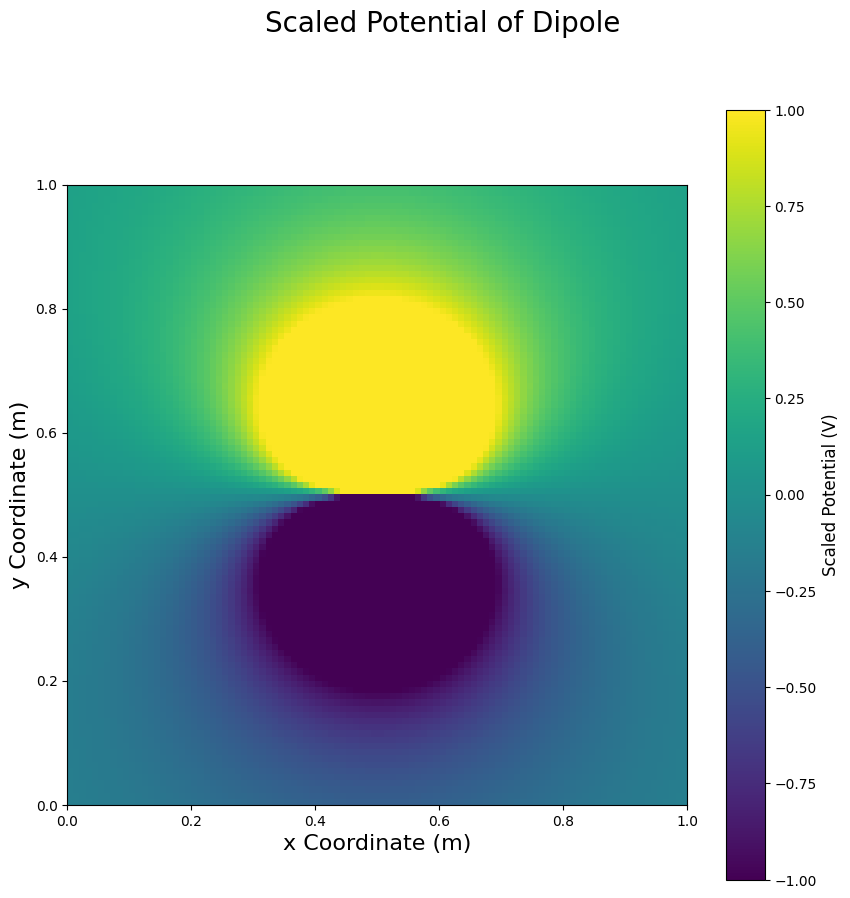

In [61]:
# code
def Potential(r,q):
    return q / ((r[0]**2 + r[1]**2)**(1/2)) # Denominator is r

xVals = np.linspace(0,1,100)
yVals = np.linspace(0,1,100)

grid = np.zeros((100,100))
charge1_Pos = np.array([0.45,0.5])
charge2_Pos = np.array([0.55,0.5])

for i in range(100):
    for j in range(100):
        r = np.array([xVals[i],yVals[j]])
        v1 = Potential(r - charge1_Pos,1) # Potential from charge 1
        v2 = Potential(r - charge2_Pos,-1) # Potential from charge 2
        vTot = v1 + v2 # Total Potential
        grid[i][j] = vTot

print(grid)

fig = plt.figure(figsize = (10,10))
fig.suptitle("Scaled Potential of Dipole", fontsize = 20)
ax = plt.subplot(111)
ax.set_xlabel("x Coordinate (m)", size = 16)
ax.set_ylabel("y Coordinate (m)", size = 16)

graph = ax.imshow(grid, extent = (0,1,0,1), vmin=-1,vmax=1)
bar = fig.colorbar(graph)
bar.set_label("Scaled Potential (V)", size = 12)



Use the electric potential you calculated above to calculate the electric field on the same grid. You may find it convenient to track the x and y components of the electric field in separate 2 dimensional arrays. Recall the instructions in Chapter 5 for computing partial derivatives.

Visualizing this electric field is a bit trickier, since the field has both magnitude and direction. `imshow` may be useful for debugging the x or y components, but visualizing the whole field requires we use both components to plot the field. `matplotlib.pyplot` provides a vfunction called `quiver` that produces a plot of arrows; it accepts as its first two arguments two 2-Dimensional arrays specifying the x and y components of each arrow on the grid.

(30 points)

You will likely have a similar problem as above with "too close" points, but it will be much worse. The magnitude of the electric field very close to the charges may cause your plot to look very bad, almost nonsensical. Limiting the magnitude of your vectors may help. (i.e. if the quadrature sum of the components is too high, reduce the components)

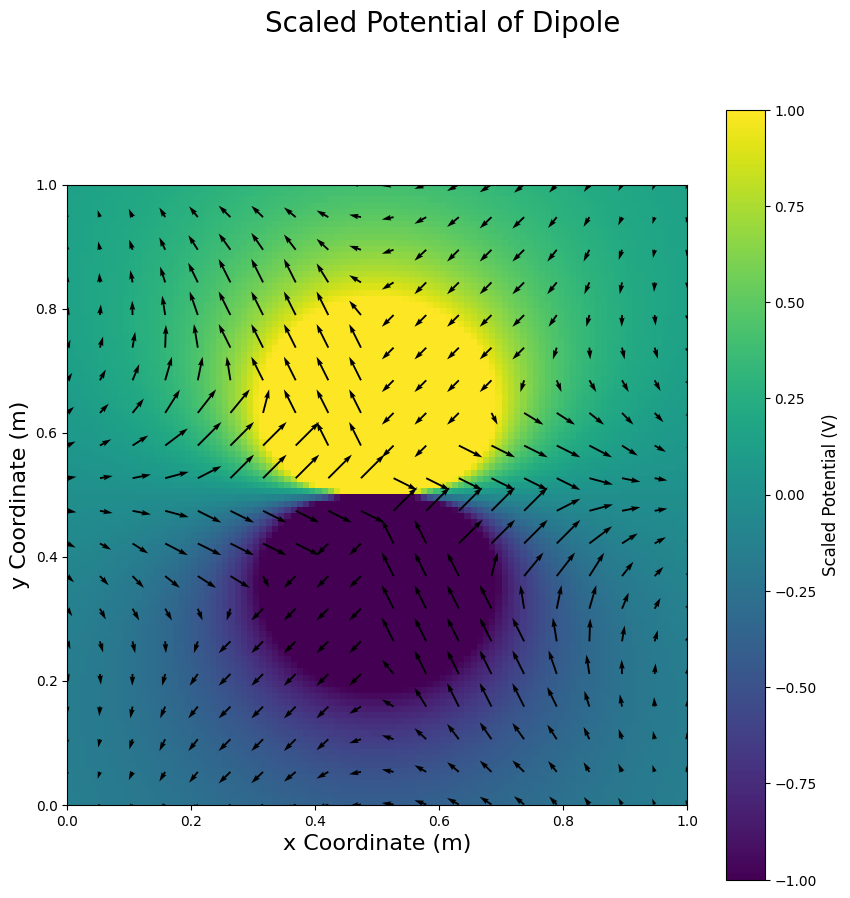

In [62]:
# code
def E_Field(function,r,h,q):
    # Defining our pertubutions in 2D space
    rx_plus = [r[0] + h, r[1]]
    rx_minus = [r[0] - h, r[1]]
    ry_plus = [r[0], r[1] + h]
    ry_minus = [r[0], r[1] - h]
    dx = (function(rx_plus, q) - function(rx_minus,q))/(2*h)
    dy = (function(ry_plus, q) - function(ry_minus,q))/(2*h)
    return (-dx,-dy) #Negative to match the potential

# Copying it down so I can see it
def Potential(r,q):
    return q / ((r[0]**2 + r[1]**2)**(1/2)) # Denominator is r

xVals = np.linspace(0,1,20)
yVals = np.linspace(0,1,20)
X, Y = np.meshgrid(xVals,yVals)
charge1_Pos = np.array([0.45,0.5])
charge2_Pos = np.array([0.55,0.5])
r = np.array([xVals[0], yVals[0]])

xComp = [] # x component of E
yComp = [] # y compoonent of E
for i in range(20):
    for j in range(20):
        r = np.array([xVals[i], yVals[j]])
        dx1, dy1 = E_Field(Potential,r - charge1_Pos,0.001,1) # Electric field for charge 1
        dx2, dy2 = E_Field(Potential,r - charge2_Pos,0.001,-1) # Electric Field for charge 2
        dx = dx1 + dx2
        dy = dy1 + dy2
        xComp.append(dx)
        yComp.append(dy)


yComp = np.clip(yComp, a_min = -1, a_max = 2)
xComp = np.clip(xComp, a_min = -1, a_max = 2)

# Creating the graphs
fig2 = plt.figure(figsize = (10,10))
fig2.suptitle("Scaled Potential of Dipole", fontsize = 20)

ax = plt.subplot(111)
ax.set_xlabel("x Coordinate (m)", size = 16)
ax.set_ylabel("y Coordinate (m)", size = 16)
ax.quiver(X,Y,xComp,yComp, minlength = 1, minshaft = 1)

graph = ax.imshow(grid, extent = (0,1,0,1), vmin=-1,vmax=1)
bar = fig2.colorbar(graph)
bar.set_label("Scaled Potential (V)", size = 12)



### Solving matrices

Exercises 6.1 in your book shows a network of resistors and suggests a method to solve for V at each point. Write out the full system of equations and then implement the code to solve them using Gaussian elimination. As usual, some code to solve the problem is provided, but you will find it more instructive to first attempt to code the solution yourself. The code is there if you get stuck. As usual I don't want to see identical code in multiple assignments!

(15 points)

Exercise 6.2 is an extension of 6.1. Complete parts a) and b) for (10 points)

Finally, Exercise 6.4 instructs you to verify you get the same answer using [numpy](https://numpy.org/doc/2.1/reference/generated/numpy.linalg.solve.html#numpy.linalg.solve). (5 points)

In [63]:
# code
row1 = [4,-1,-1,-1,1]
row2 = [-1,2,0,-1,0]
row3 = [-1,0,3,-1,1]
row4 =[-1,-1,-1,4,0]
matrix = np.array([row1,row2,row3,row4])
print(matrix)
print()

for i in range(matrix.shape[0]):
    for j in range(i + 1, matrix.shape[0]):
        ratio = matrix[j,i] / matrix [i,i]
        matrix[j,:] = matrix[j,:] - matrix[i,:]*ratio
        matrix[j,:] = matrix[j,:]/matrix[j,j]

print("The row reduced matrix is: ")
print(matrix)

for i in range(matrix.shape[0],1,-1):
    for j in range(i-1,0,-1):
        ratio = matrix[j,i] / matrix[i,i]
        matrix[j,:] -=  ratio * matrix[i,:]


print(matrix)

[[ 4 -1 -1 -1  1]
 [-1  2  0 -1  0]
 [-1  0  3 -1  1]
 [-1 -1 -1  4  0]]

The row reduced matrix is: 
[[ 4 -1 -1 -1  1]
 [ 0  1  0 -1  0]
 [ 0  0  1  0  0]
 [ 0  0  0  1  0]]


IndexError: index 4 is out of bounds for axis 0 with size 4

I couldn't figure out the reverse process. I don't know what is off with my bounds, but I've spend 3 hours trying this and it's still not working. I even went through the entire process of my code by hand and it worked on paper. So, unless you can spot what's off with my bounds, I'm going to submit this unfinished.